In [1]:
import scanpy as sc
import anndata as ad
import multigrate
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt
import gdown

In [2]:
%config InlineBackend.figure_format = 'retina'

# Load the dataset

In [3]:
gdown.download(
    'https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D',
    'kotliarov2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D
To: /home/aomidi/theis/multigrate/example/kotliarov-expressions.h5ad
420MB [02:22, 2.94MB/s] 


'kotliarov-expressions.h5ad'

In [3]:
scrna = sc.read_h5ad('kotliarov2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 53196 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
gdown.download(
    'https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM',
    'kotliarov2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM
To: /home/aomidi/theis/multigrate/example/kotliarov-proteins.h5ad
145MB [00:48, 2.96MB/s] 


'kotliarov-proteins.h5ad'

In [4]:
cite = sc.read_h5ad('kotliarov2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 53196 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Clean the data

In [5]:
# use more general annotation
# can change to cluster_level2 or cluster_level3 if needed (finer annotation)
scrna.obs['cell_type'] = scrna.obs['cluster_level1'].astype(str)
cite.obs['cell_type'] = cite.obs['cluster_level1'].astype(str)

In [9]:
scrna1 = scrna[scrna.obs['batch'] == 1]
scrna2 = scrna[scrna.obs['batch'] == 2]

In [10]:
scrna1

View of AnnData object with n_obs × n_vars = 28229 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
scrna2

View of AnnData object with n_obs × n_vars = 24967 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
cite1 = cite[cite.obs['batch'] == 1]
cite2 = cite[cite.obs['batch'] == 2]

In [13]:
cite1

View of AnnData object with n_obs × n_vars = 28229 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
cite2

View of AnnData object with n_obs × n_vars = 24967 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Paired setting

## Configure and train the model

In [15]:
# paired
model = multigrate.models.MultiVAE(
    adatas=[[scrna1, scrna2], [cite1, cite2]],
    names=[['scRNAseq-batch1', 'scRNAseq-batch2'], ['scCITEseq-batch1', 'scCITEseq-batch2']],
    pair_groups=[[0, 1], [0, 1]],
    z_dim=20,
    h_dim=128,
    hiddens=[[], []],
    output_activations=['linear', 'linear'],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-3,
    integ_coef=1,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [16]:
model.train(
    n_iters=50000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=20000,
    validate_every=3300,
    verbose=1
)

 |████████████████████| 100.0% iter=50000/50000, time=38.44(s), loss=0.6947, recon=0.3331, kl=172.4912, integ=0.1891, cycle=1.1813, val_loss=0.7232, val_recon=0.2684, val_kl=171.7574, val_integ=0.2830, val_cycle=0.9156

## Plot training history

In [17]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,train_cycle,val_loss,val_recon,val_kl,val_integ,val_cycle
0,3300,2.252009,0.515468,111.404982,1.723691,1.983890,2.215807,0.342595,177.885352,1.843860,1.325723
1,6600,0.779901,0.404476,233.769160,0.316058,1.562431,1.170522,0.293316,264.903819,0.789787,1.113173
2,9900,0.650889,0.376966,251.686417,0.173562,1.365520,0.624792,0.273595,243.297938,0.230765,0.917459
3,13200,0.636589,0.345370,219.047343,0.160052,1.228940,0.655961,0.271395,211.848937,0.244746,0.902111
4,16500,0.682994,0.357833,201.714050,0.174000,1.255965,0.690856,0.269995,192.081706,0.262395,0.900926
5,19800,0.707901,0.352670,186.016088,0.187972,1.249654,0.728698,0.271062,176.034364,0.283363,0.911479
6,23100,0.713103,0.337236,176.534302,0.199332,1.211036,0.727708,0.266790,175.485569,0.285433,0.900271
7,26400,0.711520,0.334516,173.829824,0.203175,1.188083,0.729054,0.266673,171.104351,0.291277,0.897283
8,29700,0.713714,0.344693,172.349889,0.196671,1.229776,0.727108,0.267571,170.408648,0.289128,0.901169
9,33000,0.714861,0.346045,171.927068,0.196889,1.238961,0.729583,0.266611,172.301552,0.290670,0.910090


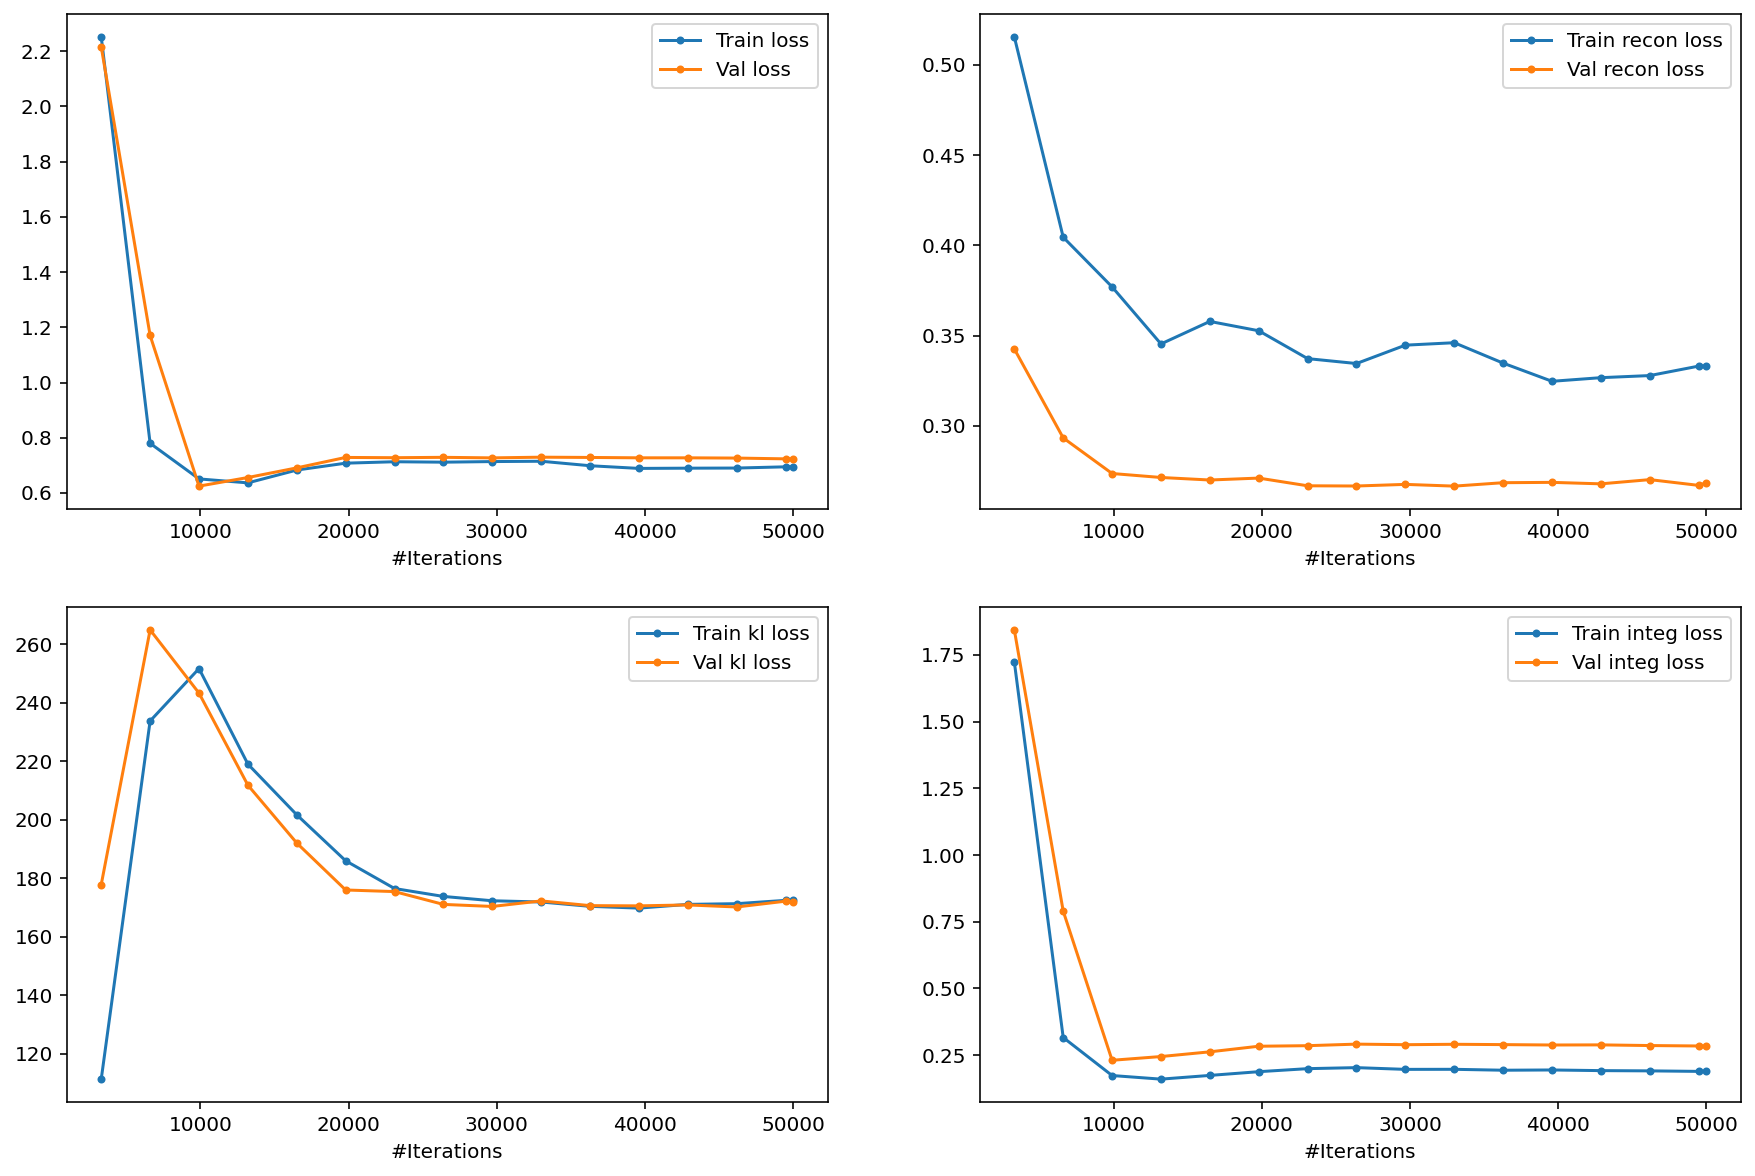

In [18]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [19]:
z = model.predict(
    adatas=[[scrna1, scrna2], [cite1, cite2]],
    names=[['scRNAseq-batch1', 'scRNAseq-batch2'], ['scCITEseq-batch1', 'scCITEseq-batch2']],
    batch_size=64,
)
z

/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 106392 × 20
    obs: 'modality', 'cell_type', 'batch'

In [20]:
sc.pp.neighbors(z)
sc.tl.umap(z)

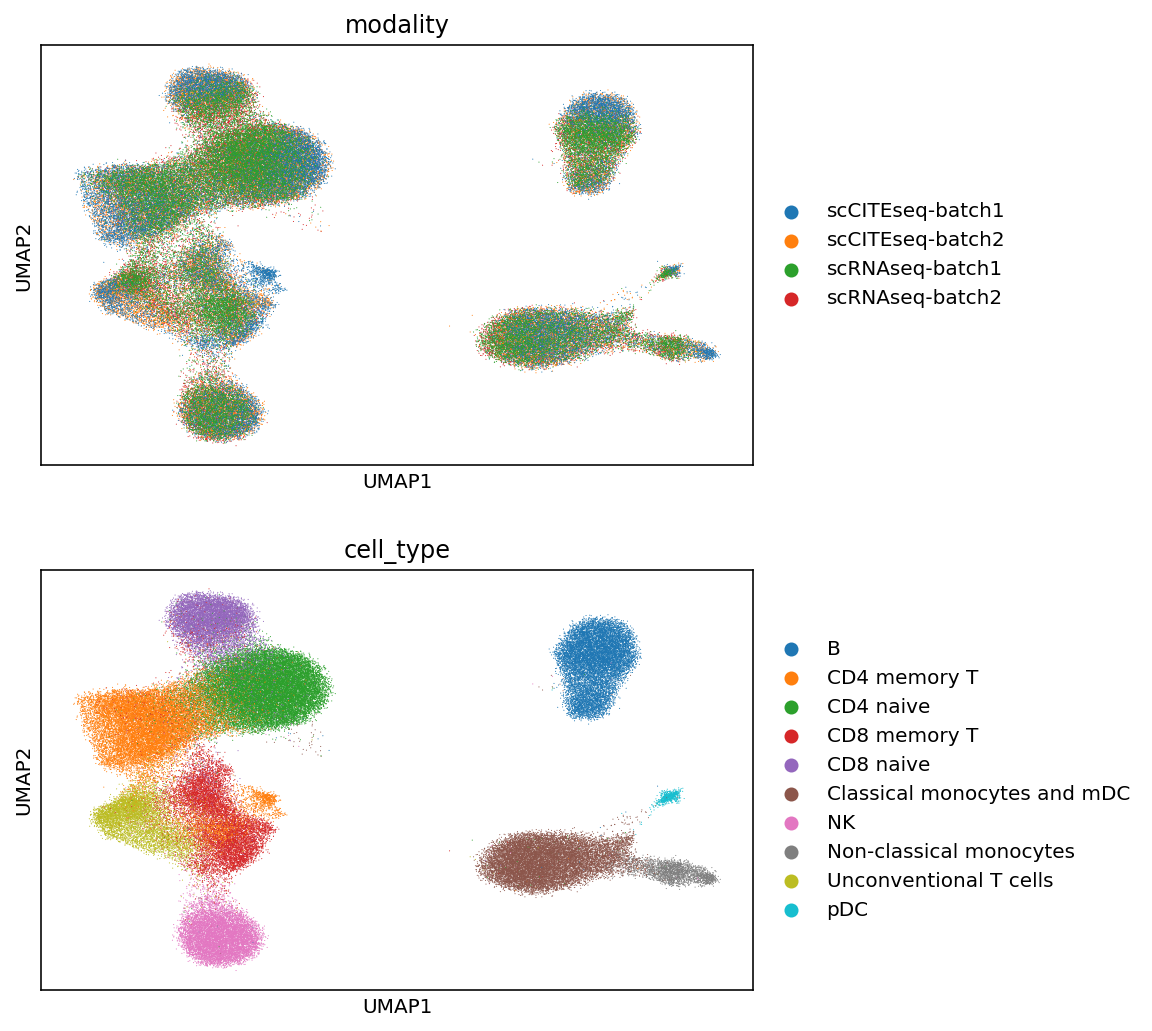

In [23]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

## Metrics

In [24]:
sc.pp.pca(z)
metrics = multigrate.metrics.metrics(
    z, z,
    batch_key='modality',
    label_key='cell_type',
    method='multigrate'
)
metrics

Clustering...
ASW label/batch...


/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_catego

PCR batch...
Graph connectivity...
ASW label...


/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/multigrate-0.1.0-py3.7.egg/multigrate/metrics.py:548: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  _,labs = connected_components(adata_post_sub.uns['neighbors']['connectivities'], connection='strong')


NMI cluster/label...
ARI cluster/label...
Isolated label silhouette...


/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:390: RuntimeWarning: overflow encountered in long_scalars
  (tp + fp) * (fp + tn))


,score
ASW_label/batch,0.978770
PCR_batch,0.000000
graph_conn,0.992381
ASW_label,0.574946
NMI_cluster/label,0.821685
ARI_cluster/label,2.226329
isolated_label_silhouette,0.547720
